        Date   Door TO Door  GARDEN/Biomass  PRIVATE Vehicle    TOTAL  \
0  01-02-2021       552.300          55.200            6.600  614.100   
1  02-02-2021       543.375          52.270           13.055  608.700   
2  03-02-2021       526.965          53.205           10.780  590.950   
3  04-02-2021       532.745          53.550           16.580  602.875   
4  05-02-2021       534.260          58.375            7.675  600.310   

   DEBRIS C&D Waste         Day  
0             29.245     Monday  
1             28.920    Tuesday  
2             31.100  Wednesday  
3             34.815   Thursday  
4             28.845     Friday  
    Collection Date  Door TO Door  GARDEN/Biomass  PRIVATE Vehicle    TOTAL  \
176      2021-07-27       568.220          52.290           34.990  655.500   
177      2021-07-28       558.925          57.845           12.150  628.920   
178      2021-07-29       567.030          54.960           26.930  648.920   
179      2021-07-30       539.635        

<AxesSubplot:xlabel='Day', ylabel='GARDEN/Biomass'>

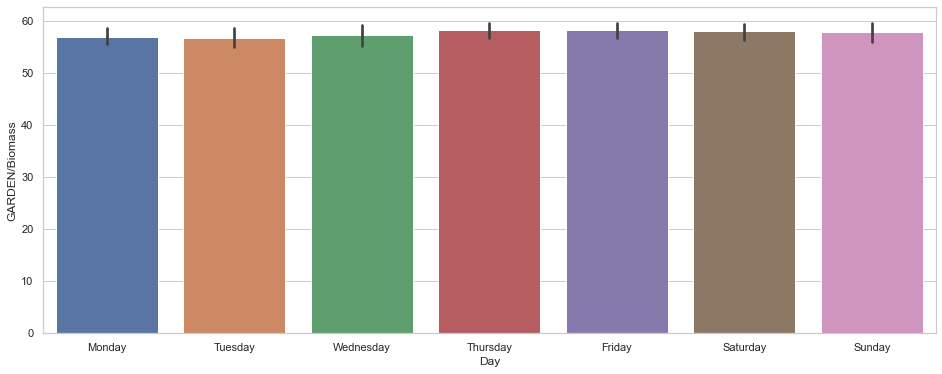

In [1]:
import pandas as pd
from pandas import Series as s
import seaborn as sns
import datetime
import numpy as np
from matplotlib import pyplot as plt



dailycollection = pd.read_csv("Data/MSWMonthWiseCollectioncsv.csv")
#df = pd.read_csv(file, parse_dates=['T'], index_col=['T'])

print(dailycollection.head())

#Rename column names with extra spaces
dailycollection.rename(columns = {"Date ":"Collection Date", "DEBRIS C&D Waste ":"DEBRIS C&D Waste"}, inplace = True)

#Converting to format of Date required by Series 'YYYY-mm-dd'
dailycollection["Collection Date"] =   pd.to_datetime(dailycollection["Collection Date"], format='%d-%m-%Y').dt.strftime('%Y-%m-%d')

#Adding new column Day_Index for computations
dailycollection['Day_Index'] = pd.to_datetime(dailycollection['Collection Date']).dt.dayofweek
lastfive = dailycollection.tail()
# lastfive.to_excel(lastfive.xlsx)
print(dailycollection.tail())

sns.set_theme(style="whitegrid")

plt.figure(figsize=(16, 6))

sns.barplot(x="Day", y = "GARDEN/Biomass", data = dailycollection )






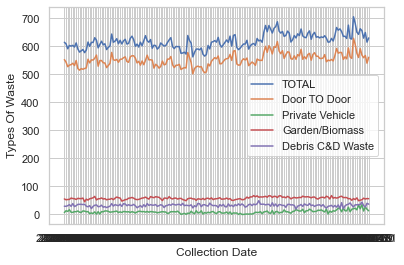

In [2]:
sns.lineplot(data=dailycollection, x="Collection Date", y="TOTAL")

sns.lineplot(data=dailycollection, x="Collection Date", y="Door TO Door")


sns.lineplot(data=dailycollection, x="Collection Date", y="PRIVATE Vehicle")


sns.lineplot(data=dailycollection, x="Collection Date", y="GARDEN/Biomass")

p = sns.lineplot(data=dailycollection, x="Collection Date", y="DEBRIS C&D Waste")

p.set_ylabel("Types Of Waste")

plt.legend(labels=["TOTAL","Door TO Door","Private Vehicle","Garden/Biomass","Debris C&D Waste"])



<AxesSubplot:xlabel='Day', ylabel='GARDEN/Biomass'>

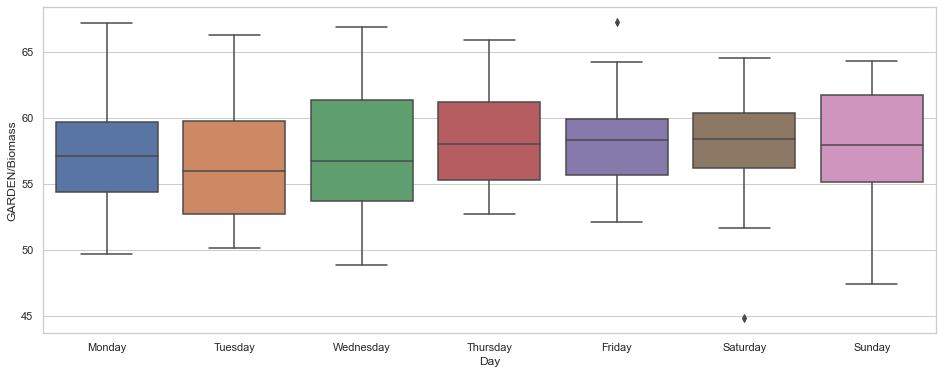

In [3]:
plt.figure(figsize=(16, 6))

sns.boxplot(x = dailycollection['Day'], y =  dailycollection['GARDEN/Biomass'])

<AxesSubplot:xlabel='Collection Date', ylabel='GARDEN/Biomass'>

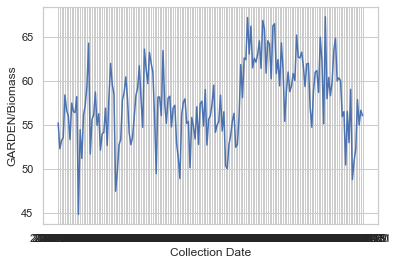

In [4]:
sns.lineplot(data=dailycollection, x="Collection Date", y="GARDEN/Biomass")


# Time Series Data Analysis of Garbage Collection Data

In [5]:
dailycollection_idx = dailycollection[:]

print(min(dailycollection_idx["Collection Date"]))
print(max(dailycollection_idx['Collection Date']))

#Sorting by date
dailycollection_idx = dailycollection_idx.sort_values('Collection Date')
dailycollection_idx['Collection Date'] = pd.to_datetime(dailycollection_idx['Collection Date'])

2021-02-01
2021-07-31


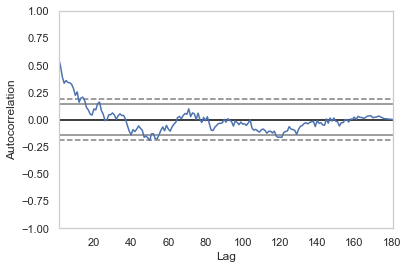

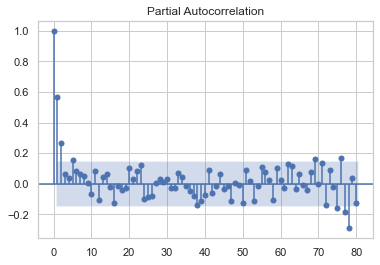

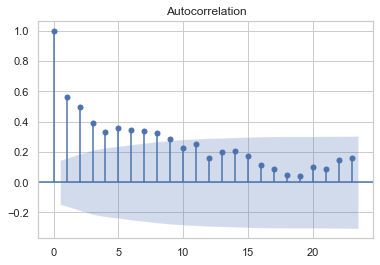

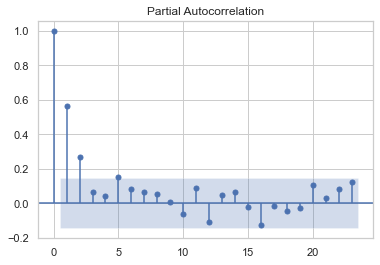

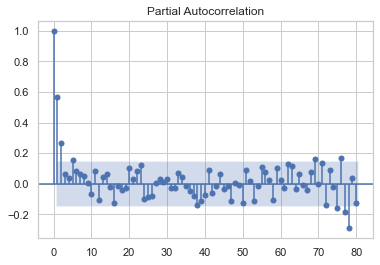

In [6]:
# # Creating Autocorrelation plot

from pandas.plotting import autocorrelation_plot

autocorrelation_plot(dailycollection_idx['GARDEN/Biomass'])

plt.show()

from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

plot_acf(dailycollection_idx['GARDEN/Biomass'])
plot_pacf(dailycollection_idx['GARDEN/Biomass'])
plot_pacf(dailycollection_idx['GARDEN/Biomass'], lags = 80)

In [7]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

Collection Date
2021-02-01    55.200
2021-02-02    52.270
2021-02-03    53.205
2021-02-04    53.550
2021-02-05    58.375
               ...  
2021-07-27    52.290
2021-07-28    57.845
2021-07-29    54.960
2021-07-30    56.635
2021-07-31    56.020
Freq: D, Name: GARDEN/Biomass, Length: 181, dtype: float64


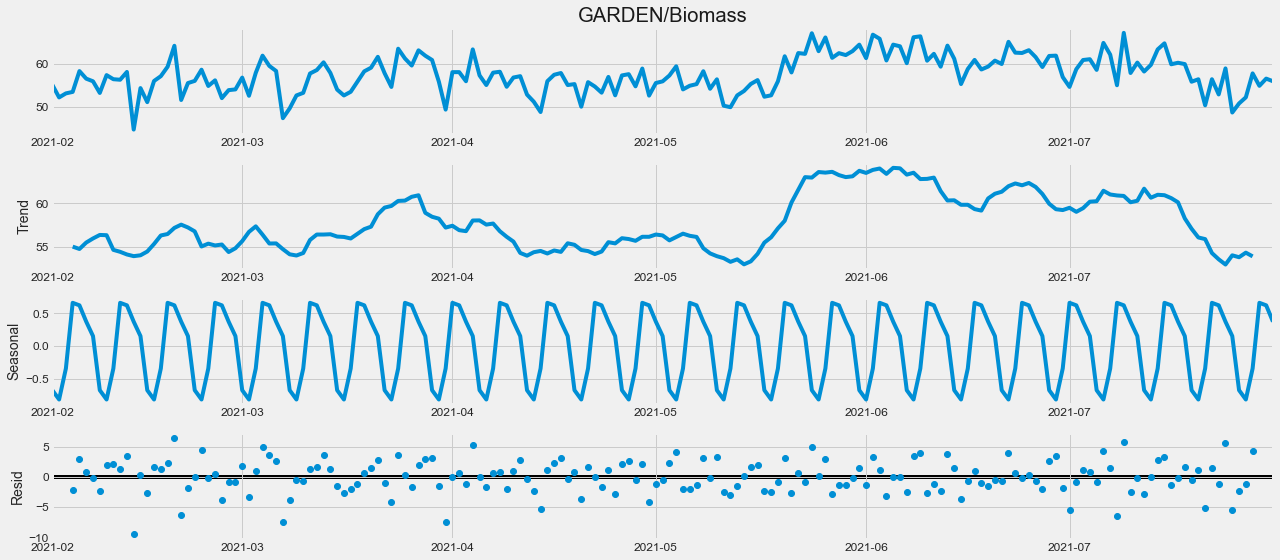

In [8]:
from pylab import rcParams

#Resample using the average of daily garbage collection. However in this case the daily average would be same because it is one record .
daily_resampled = dailycollection_idx.reset_index().set_index("Collection Date").resample('D')['GARDEN/Biomass'].sum()
print(daily_resampled)

#Seasonality Patterns
rcParams['figure.figsize'] = [18,8]

# Seasonal Decomposition by Moving Averages
decomposition = sm.tsa.seasonal_decompose(daily_resampled, model='additive')
fig = decomposition.plot()
plt.show()



In [9]:
#p = Seasonality , d = Trend and q = Noise
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 0, 2, 7)
SARIMAX: (0, 0, 2) x (0, 1, 0, 7)
SARIMAX: (0, 0, 2) x (0, 1, 1, 7)


In [10]:
aic_result = []
param_min_aci = {}

for param in pdq:
    count = 0
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(daily_resampled,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            aic_result.append(results.aic)
            param_min_aci.update({results.aic:(param, param_seasonal)})
            print('6 Months Sample ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except RuntimeError:
            print("Error")
            continue
print("AIC: {} Param: {}", min(aic_result), param_min_aci[min(aic_result)])

6 Months Sample ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC:1973.6361981183486
6 Months Sample ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC:1696.6831075379891
6 Months Sample ARIMA(0, 0, 0)x(0, 0, 2, 7) - AIC:1490.3097385688886
6 Months Sample ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC:1042.4253501070393
6 Months Sample ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC:961.3626249670921
6 Months Sample ARIMA(0, 0, 0)x(0, 1, 2, 7) - AIC:926.4548594086324
6 Months Sample ARIMA(0, 0, 0)x(0, 2, 0, 7) - AIC:1168.7535939482307
6 Months Sample ARIMA(0, 0, 0)x(0, 2, 1, 7) - AIC:980.7918482242201
6 Months Sample ARIMA(0, 0, 0)x(0, 2, 2, 7) - AIC:909.1212450238216
6 Months Sample ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC:1049.144271763544
6 Months Sample ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC:1006.3018286697277
6 Months Sample ARIMA(0, 0, 0)x(1, 0, 2, 7) - AIC:963.8567711066116
6 Months Sample ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC:977.9786153721692
6 Months Sample ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC:968.1200696186431
6 Months Sample ARIMA(0, 0, 0)x(1, 1, 2, 7

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.3134      0.268     -4.898      0.000      -1.839      -0.788
ma.L2         -0.1331      0.164     -0.813      0.416      -0.454       0.188
ma.S.L7       -1.7021      0.081    -21.022      0.000      -1.861      -1.543
ma.S.L14       0.7349      0.083      8.875      0.000       0.573       0.897
sigma2         7.3763      2.058      3.585      0.000       3.344      11.409


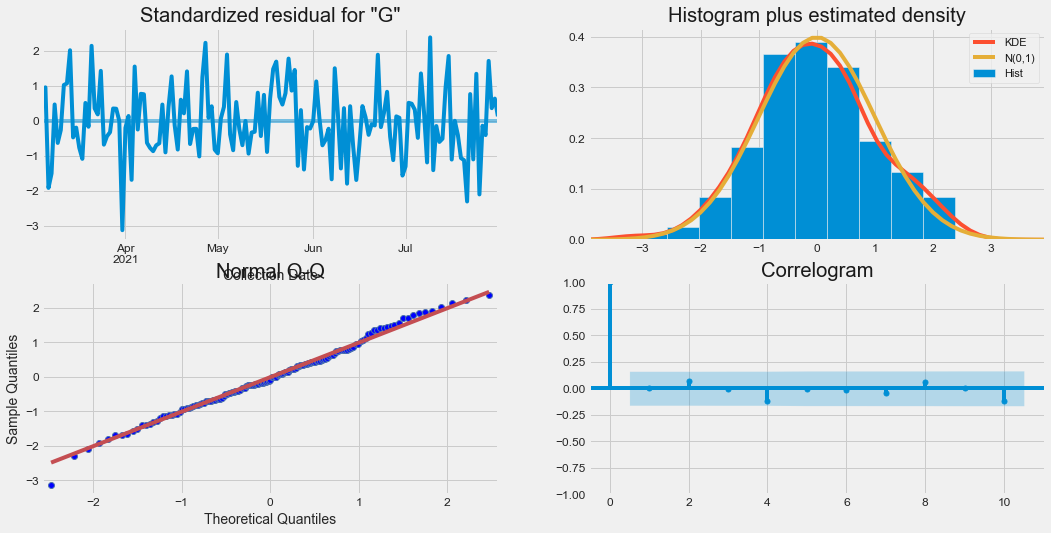

In [11]:
#AARIMA(0, 1, 1)x(0, 1, 1, 7) - AIC:895.7797990033919 - 6 months
#ARIMA(0, 1, 2)x(0, 2, 2, 7) - AIC:849.2096733088783 - 6 months

#Fit the model for the least value for optimal option
mod = sm.tsa.statespace.SARIMAX(daily_resampled,
                                order=(0, 1, 2),
                                seasonal_order=(0, 2, 2, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

# mod = sm.tsa.statespace.SARIMAX(daily_resampled,
#                                  order=(0, 1, 1),
#                                  seasonal_order=(0, 1, 1, 7),
#                                  enforce_stationarity=False,
#                                  enforce_invertibility=False)


results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(16, 8))
plt.show()

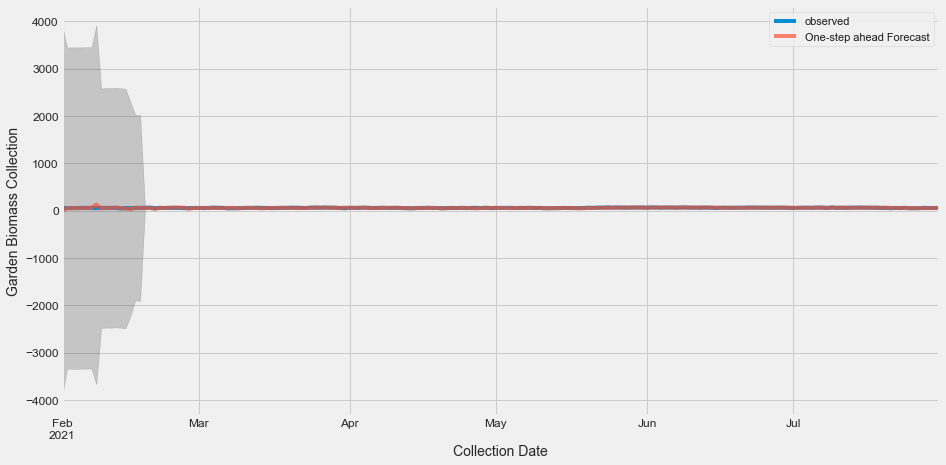

In [12]:
pred = results.get_prediction(start=pd.to_datetime(dailycollection_idx['Collection Date'][0]), dynamic=False)
pred_ci = pred.conf_int()

ax = daily_resampled['2021':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Collection Date')
ax.set_ylabel('Garden Biomass Collection')
plt.legend()

plt.show()

In [13]:
y_forecasted_gb = pred.predicted_mean
y_truth = daily_resampled[dailycollection_idx['Collection Date'][0]:]

mse_garden = ((y_forecasted_gb - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse_garden, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse_garden), 2)))

mse_garden = round(mse_garden, 2)

gb = {"mse":mse_garden, "forecast": y_forecasted_gb}
%store gb


The Mean Squared Error of our forecasts is 69.08
The Root Mean Squared Error of our forecasts is 8.31
Stored 'gb' (dict)


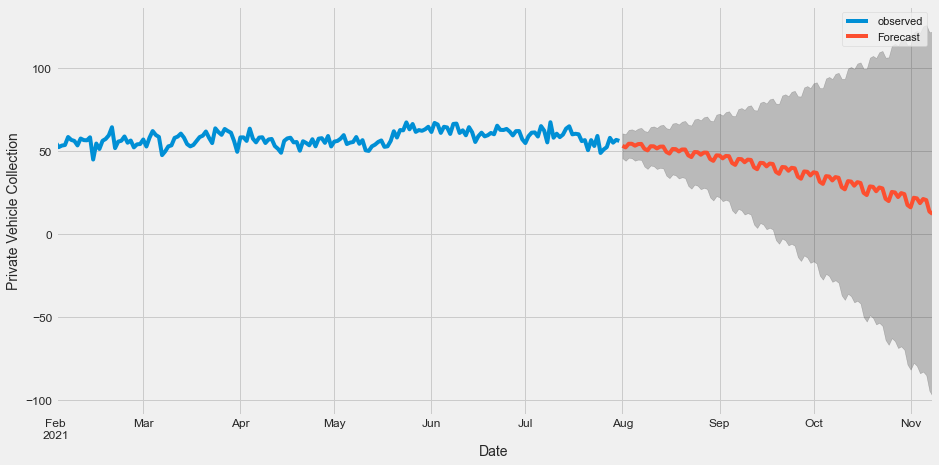

In [14]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = daily_resampled.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Private Vehicle Collection')

plt.legend()
plt.show()

# Ljung  Box Diagnostic Test


      lb_stat     lb_pvalue
1    0.602901  4.374731e-01
2    0.786939  6.747118e-01
3    1.188511  7.557612e-01
4    1.197221  8.785559e-01
5    2.237847  8.153508e-01
6    3.066266  8.004849e-01
7   43.878011  2.256513e-07
8   44.809379  3.999113e-07
9   45.178608  8.550603e-07
10  45.368870  1.865552e-06


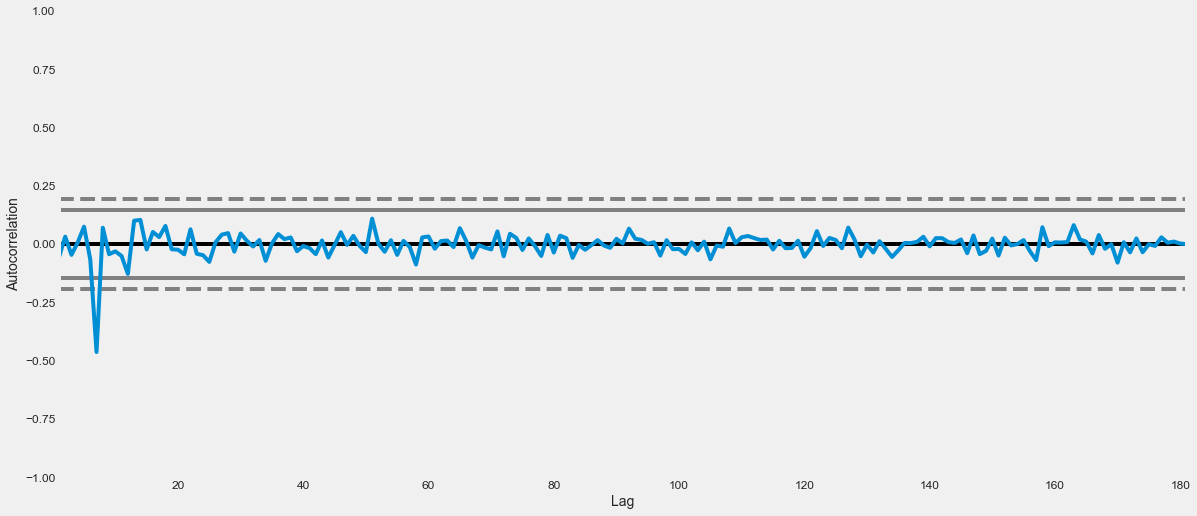

<AxesSubplot:ylabel='lb_stat'>

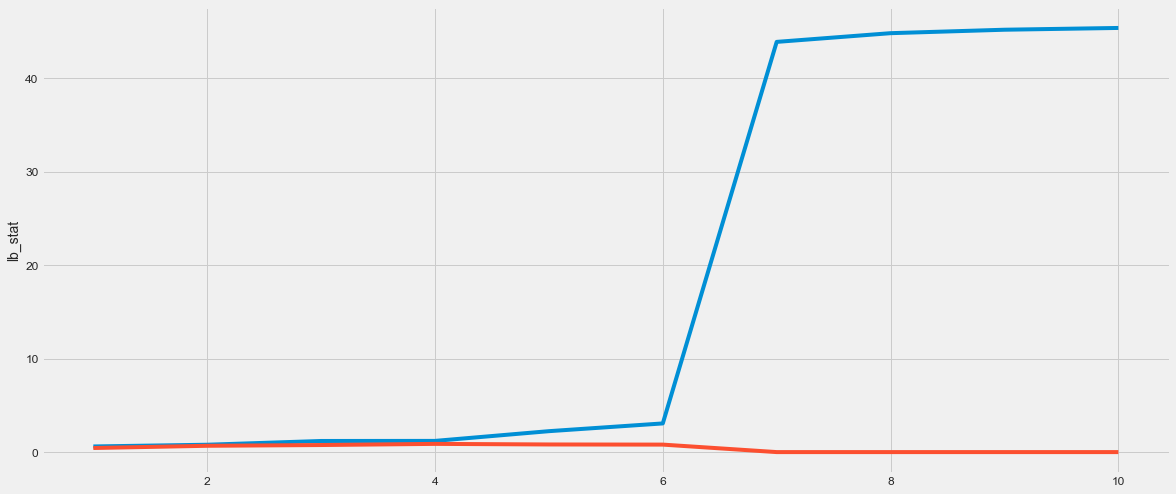

In [15]:
residual = results.resid
diagnostics = sm.stats.acorr_ljungbox(residual, lags=10, return_df= True)
print(diagnostics)
autocorrelation_plot(residual)
plt.show()
sns.lineplot(data = diagnostics["lb_stat"] )
sns.lineplot(data = diagnostics["lb_pvalue"] )


# Validating the one month forecast by splitting to 5:1 train to test ratio

In [16]:
idx = dailycollection_idx.loc[dailycollection_idx["Collection Date"] == '2021-06-30'].index[0]+1
dailycollection_train = daily_resampled[:idx]
dailycollection_test = daily_resampled[idx+1:]

for param in pdq:
    count = 0
    aic_result = []
    param_min_aci = {}
    for param in pdq:
        count = 0
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dailycollection_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            aic_result.append(results.aic)
            param_min_aci.update({results.aic:(param, param_seasonal)})
            print('5 Months Sample ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except RuntimeError:
            print("Error")
            continue
print("AIC: {} Param: {}", min(aic_result), param_min_aci[min(aic_result)])


5 Months Sample ARIMA(2, 2, 2)x(0, 0, 0, 7) - AIC:789.7087985751795
5 Months Sample ARIMA(2, 2, 2)x(0, 0, 1, 7) - AIC:757.9219658853367
5 Months Sample ARIMA(2, 2, 2)x(0, 0, 2, 7) - AIC:710.3090618154391
5 Months Sample ARIMA(2, 2, 2)x(0, 1, 0, 7) - AIC:835.6165768182348
5 Months Sample ARIMA(2, 2, 2)x(0, 1, 1, 7) - AIC:721.8364789913446
5 Months Sample ARIMA(2, 2, 2)x(0, 1, 2, 7) - AIC:693.5908203575676
5 Months Sample ARIMA(2, 2, 2)x(0, 2, 0, 7) - AIC:940.78667416952
5 Months Sample ARIMA(2, 2, 2)x(0, 2, 1, 7) - AIC:765.190573112292
5 Months Sample ARIMA(2, 2, 2)x(0, 2, 2, 7) - AIC:678.7667904782007
5 Months Sample ARIMA(2, 2, 2)x(1, 0, 0, 7) - AIC:761.5293361719862
5 Months Sample ARIMA(2, 2, 2)x(1, 0, 1, 7) - AIC:758.6883491068259
5 Months Sample ARIMA(2, 2, 2)x(1, 0, 2, 7) - AIC:698.2080761602815
5 Months Sample ARIMA(2, 2, 2)x(1, 1, 0, 7) - AIC:749.0783969159438
5 Months Sample ARIMA(2, 2, 2)x(1, 1, 1, 7) - AIC:733.6568014154489
5 Months Sample ARIMA(2, 2, 2)x(1, 1, 2, 7) - AIC:6

In [17]:
pred = results.get_prediction(start=pd.to_datetime(dailycollection_train.index[0]), dynamic=False)
pred_ci = pred.conf_int()
y_forecasted = pred.predicted_mean
y_truth = dailycollection_train

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))



The Mean Squared Error of our forecasts is 100.93
The Root Mean Squared Error of our forecasts is 10.05


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6520      0.069     -9.389      0.000      -0.788      -0.516
ma.S.L7       -0.8728      0.083    -10.547      0.000      -1.035      -0.711
sigma2        12.1249      1.471      8.240      0.000       9.241      15.009


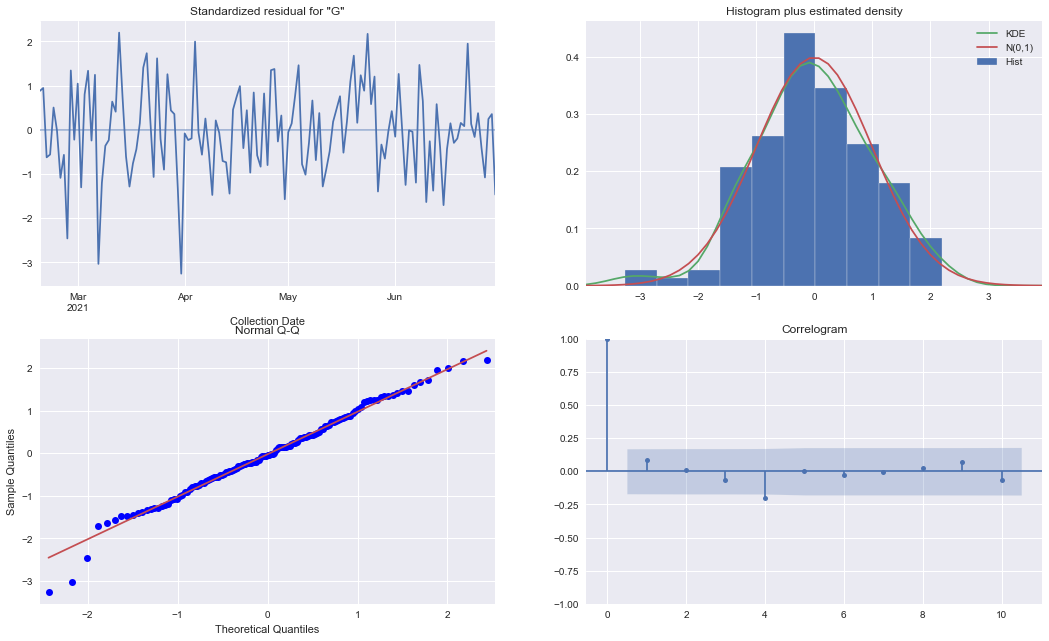

In [54]:
#AIC: {} Param: {} 719.9396668384564 ((0, 1, 1), (0, 1, 1, 7))
#AIC: {} Param: {} 678.7667904782007 ((2, 2, 2), (0, 2, 2, 7))
mod = sm.tsa.statespace.SARIMAX(dailycollection_train,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(16, 10))
plt.show()


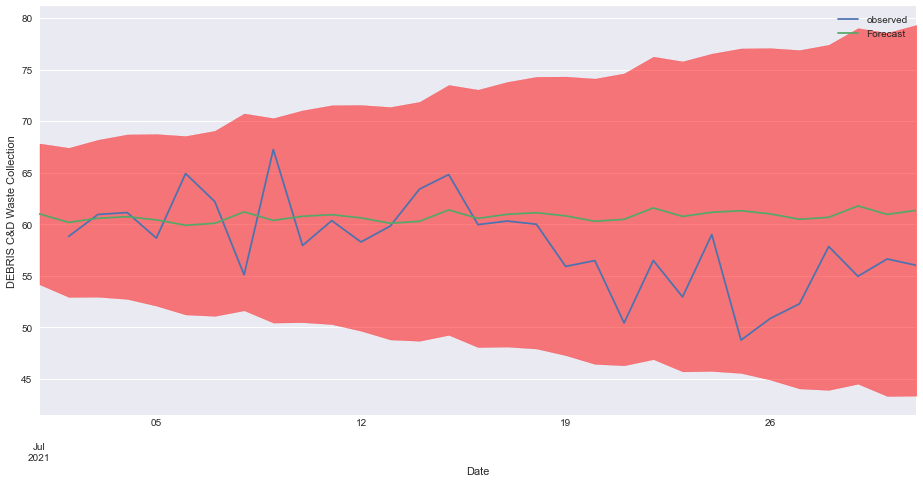

In [55]:
#Prediction Result Wrapper
pred_uc = results.get_forecast(steps=31)
#Confidence Interval
pred_ci = pred_uc.conf_int()

ax = dailycollection_test.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='red', alpha=.50)
ax.set_xlabel('Date')
ax.set_ylabel('DEBRIS C&D Waste Collection')

plt.legend()
plt.show()

In [56]:
y_forecasted = pred_uc.predicted_mean
y_truth = dailycollection_test
#
mse_debris = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse_debris, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse_debris), 2)))


The Mean Squared Error of our forecasts is 27.21
The Root Mean Squared Error of our forecasts is 5.22


In [29]:
 #Train Test Generator


def rolling_forecast(train, min_train_length, horizon):
    for i in range(0, len(train) - min_train_length, 5):
        split_train = train[: min_train_length + i]
        split_val = train[min_train_length + i: min_train_length + i + horizon]
        yield split_train, split_val


###
# Training Set [4 months from 1st feb'2021  to 31st May'2021]
# Validation Set [1 month from 1st Jun '2021  to 30th July'2021]
# Test Set [31 steps from 31st July'2021 to 31st Aug' 2021]
###
SPLIT_DATE = '2021-07-01'
train = daily_resampled.loc[daily_resampled.index < SPLIT_DATE]

# # for testing rolling function
# cv_rolling = rolling_forecast(train, 120, 5)
#
# i = 0
# for split_train, split_val in cv_rolling:
#     print(f'CV[{i+1}]')
#     print(f'Train length:\t{len(split_train)}')
#     print(f'Test Set:\t{split_val}')
#     i += 1


CV[1]
The Mean Squared Error of our forecasts is 5.64
The Root Mean Squared Error of our forecasts is 2.37
CV[2]
The Mean Squared Error of our forecasts is 12.73
The Root Mean Squared Error of our forecasts is 3.57
CV[3]
The Mean Squared Error of our forecasts is 21.48
The Root Mean Squared Error of our forecasts is 4.63
CV[4]
The Mean Squared Error of our forecasts is 3.1
The Root Mean Squared Error of our forecasts is 1.76
CV[5]
The Mean Squared Error of our forecasts is 12.19
The Root Mean Squared Error of our forecasts is 3.49
CV[6]
The Mean Squared Error of our forecasts is 10.16
The Root Mean Squared Error of our forecasts is 3.19
Average RMSE score for 6 folds:  3.1683333333333334
Min RMSE score 6 folds:  1.76
Score Length  6
                                     SARIMAX Results                                     
Dep. Variable:                    GARDEN/Biomass   No. Observations:                  135
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood            

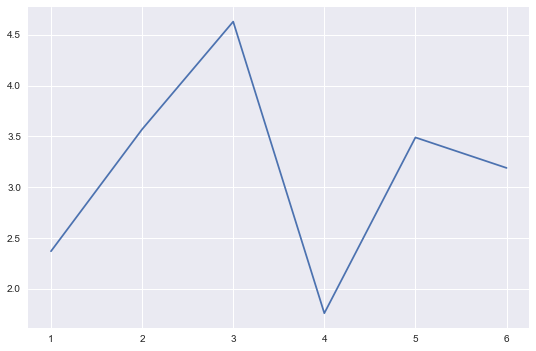

In [30]:


from numpy import mean

result_for_test = {}


def cross_validation_score(cv, order, seasonal_order):
    cv_scores = []
    i = 0
    for cv_train, cv_test in cv:
        model = sm.tsa.statespace.SARIMAX(cv_train,
                                          order=order,
                                          seasonal_order=seasonal_order,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
        result = model.fit()
        print(f'CV[{i + 1}]')
        # print(result.summary())
        y_forecasted = result.forecast(steps=len(cv_test))
        y_truth = cv_test
        mse = ((y_forecasted - y_truth) ** 2).mean()
        rmse = round(np.sqrt(mse), 2)
        print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
        print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
        cv_scores.append(rmse)
        result_for_test.update({rmse: result})
        i += 1
    return np.array(cv_scores)


cv_rolling = rolling_forecast(train, 120, 5)
cv_scores_list = cross_validation_score(cv_rolling, order=(1, 1, 1), seasonal_order=(0, 1, 1, 7))
print("Average RMSE score for 6 folds: ", mean(cv_scores_list))
print("Min RMSE score 6 folds: ", min(cv_scores_list))
print("Score Length ", len(cv_scores_list))
sns.lineplot(x=[1, 2, 3, 4, 5, 6], y=cv_scores_list)
min_result = result_for_test[min(cv_scores_list)]
last_result = result_for_test[cv_scores_list[-1]]
print(min_result.summary())
print(last_result.summary())

y_forecasted = min_result.forecast(steps=31)
y_test_truth = daily_resampled.loc[daily_resampled.index >= SPLIT_DATE]
mse = ((y_forecasted - y_test_truth) ** 2).mean()
rmse = round(np.sqrt(mse), 2)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))



CV[1]
The Mean Squared Error of our forecasts is 9.0
The Root Mean Squared Error of our forecasts is 3.0
CV[2]
The Mean Squared Error of our forecasts is 27.77
The Root Mean Squared Error of our forecasts is 5.27
CV[3]
The Mean Squared Error of our forecasts is 43.93
The Root Mean Squared Error of our forecasts is 6.63
CV[4]
The Mean Squared Error of our forecasts is 8.43
The Root Mean Squared Error of our forecasts is 2.9
CV[5]
The Mean Squared Error of our forecasts is 18.46
The Root Mean Squared Error of our forecasts is 4.3
CV[6]
The Mean Squared Error of our forecasts is 25.13
The Root Mean Squared Error of our forecasts is 5.01
Average RMSE score for 6 folds:  4.5183333333333335
Min RMSE score 6 folds:  2.9
                                     SARIMAX Results                                     
Dep. Variable:                    GARDEN/Biomass   No. Observations:                  135
Model:             SARIMAX(2, 2, 2)x(0, 2, 2, 7)   Log Likelihood                -292.925
Date:  

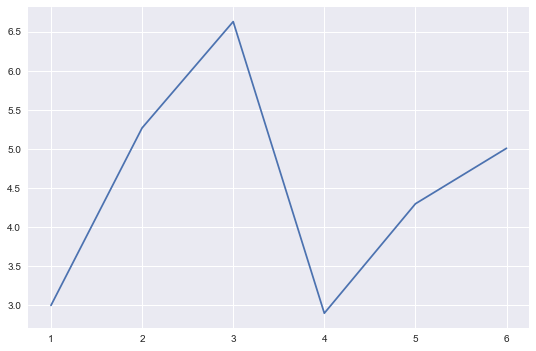

In [34]:
# Forecasting on unknown test set for specified parameters order = (0,1,2),seasonal_order =(0,2,2,7)

cv_rolling = rolling_forecast(train, 120, 5)
cv_scores_list = cross_validation_score(cv_rolling, order=(2, 2, 2), seasonal_order=(0, 2, 2, 7))
print("Average RMSE score for 6 folds: ", mean(cv_scores_list))
print("Min RMSE score 6 folds: ", min(cv_scores_list))
sns.lineplot(x=[1, 2, 3, 4, 5, 6], y=cv_scores_list)
min_result = result_for_test[min(cv_scores_list)]
last_result = result_for_test[cv_scores_list[-1]]
print(min_result.summary())
print(last_result.summary())

y_forecasted = min_result.forecast(steps=31)
y_test_truth = daily_resampled.loc[daily_resampled.index >= SPLIT_DATE]
mse = ((y_forecasted - y_test_truth) ** 2).mean()
rmse = round(np.sqrt(mse), 2)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))


CV[1]
The Mean Squared Error of our forecasts is 10.55
The Root Mean Squared Error of our forecasts is 3.25
CV[2]
The Mean Squared Error of our forecasts is 34.28
The Root Mean Squared Error of our forecasts is 5.85
CV[3]
The Mean Squared Error of our forecasts is 26.51
The Root Mean Squared Error of our forecasts is 5.15
CV[4]
The Mean Squared Error of our forecasts is 4.35
The Root Mean Squared Error of our forecasts is 2.09
CV[5]
The Mean Squared Error of our forecasts is 27.38
The Root Mean Squared Error of our forecasts is 5.23
CV[6]
The Mean Squared Error of our forecasts is 11.31
The Root Mean Squared Error of our forecasts is 3.36
Average RMSE score for 6 folds:  4.155
Minimum RMSE score:  2.09
                                     SARIMAX Results                                     
Dep. Variable:                    GARDEN/Biomass   No. Observations:                  135
Model:             SARIMAX(2, 2, 2)x(2, 2, 2, 7)   Log Likelihood                -293.204
Date:             

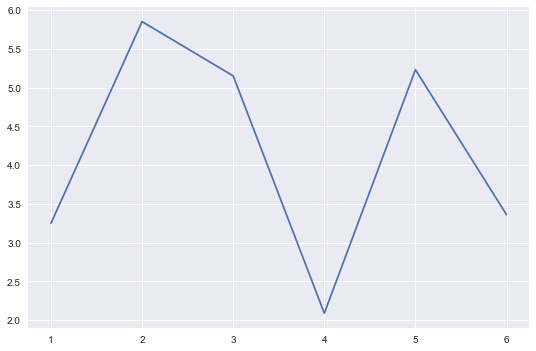

In [35]:
#Unspecified Parameters
cv_rolling = rolling_forecast(train, 120, 5)
cv_scores_list = cross_validation_score(cv_rolling, order=param, seasonal_order=param_seasonal)
print("Average RMSE score for 6 folds: ", mean(cv_scores_list))
print("Minimum RMSE score: ", min(cv_scores_list))
sns.lineplot(x=[1, 2, 3, 4, 5, 6], y=cv_scores_list)
min_result = result_for_test[min(cv_scores_list)]
last_result = result_for_test[cv_scores_list[-1]]
print(min_result.summary())
print(last_result.summary())

y_forecasted = min_result.forecast(steps=31)
y_test_truth = daily_resampled.loc[daily_resampled.index >= SPLIT_DATE]
mse = ((y_forecasted - y_test_truth) ** 2).mean()
rmse = round(np.sqrt(mse), 2)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))


# Moving Average

In [25]:
dailycollection.info()
# set date column as index
dailycollection.set_index('Collection Date', inplace=True)

dailycollection.index.name = 'GARDEN/Biomass'

dailycollection['average_gardenbio'] = dailycollection['GARDEN/Biomass'].mean()

# drop columns containing monthly values
# visualize the first 5 columns
dailycollection.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Collection Date   181 non-null    object 
 1   Door TO Door      181 non-null    float64
 2   GARDEN/Biomass    181 non-null    float64
 3   PRIVATE Vehicle   181 non-null    float64
 4   TOTAL             181 non-null    float64
 5   DEBRIS C&D Waste  181 non-null    float64
 6   Day               181 non-null    object 
 7   Day_Index         181 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 11.4+ KB


,Door TO Door,GARDEN/Biomass,PRIVATE Vehicle,TOTAL,DEBRIS C&D Waste,Day,Day_Index,average_gardenbio
GARDEN/Biomass,,,,,,,,
2021-02-01,552.300,55.200,6.600,614.100,29.245,Monday,0,57.675387
2021-02-02,543.375,52.270,13.055,608.700,28.920,Tuesday,1,57.675387
2021-02-03,526.965,53.205,10.780,590.950,31.100,Wednesday,2,57.675387
2021-02-04,532.745,53.550,16.580,602.875,34.815,Thursday,3,57.675387
2021-02-05,534.260,58.375,7.675,600.310,28.845,Friday,4,57.675387


Text(0, 0.5, 'Garden and Biomass [Tonnes]')

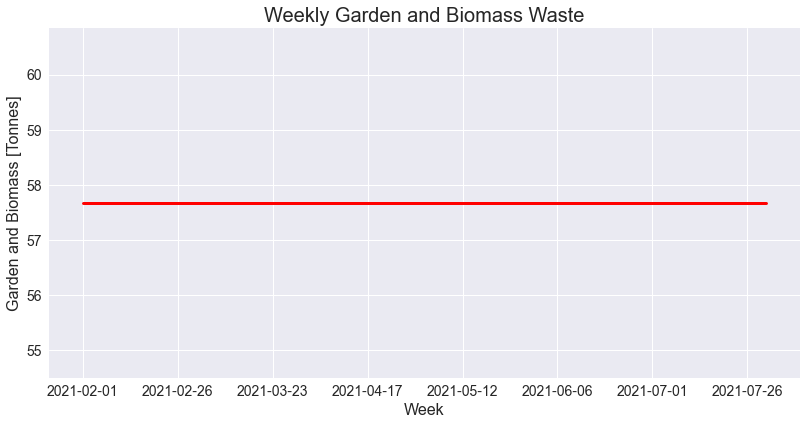

In [26]:
plt.style.use('seaborn')

dailycollection.drop(
    ['TOTAL', 'PRIVATE Vehicle', 'DEBRIS C&D Waste', 'Day', 'Day_Index', 'GARDEN/Biomass', 'Door TO Door'], axis=1,
    inplace=True)
dailycollection.plot(color='red', linewidth=3, figsize=(12, 6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend('')

# title and labels
plt.title('Weekly Garden and Biomass Waste', fontsize=20)
plt.xlabel('Week', fontsize=16)
plt.ylabel('Garden and Biomass [Tonnes]', fontsize=16)

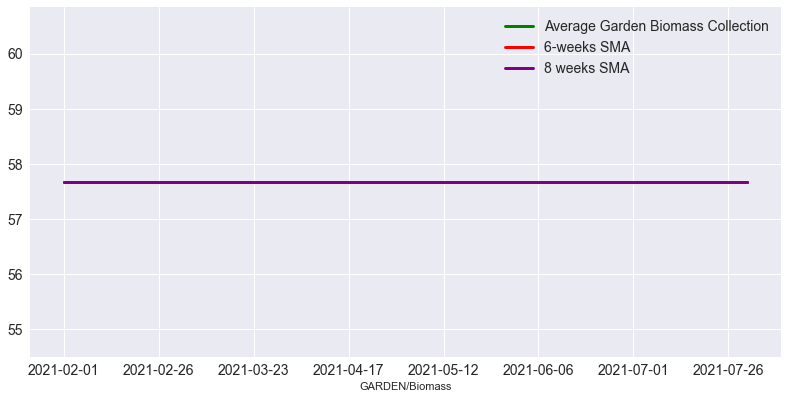

In [27]:
dailycollection['SMA_6'] = dailycollection.average_gardenbio.rolling(6, min_periods=1).mean()

dailycollection['SMA_8'] = dailycollection.average_gardenbio.rolling(8, min_periods=1).mean()
# colors for the line plot
colors = ['green', 'red', 'purple']

# line plot - the yearly average air temperature in Barcelona
dailycollection.plot(color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average Garden Biomass Collection', '6-weeks SMA', '8 weeks SMA'], fontsize=14)
